# Gradient Descent 
This notebook will show you the underlying implementation of Gradient Descent for Linear function and Sigmoid function.

If you have any suggestions, welcome to contact [hushenglang@gmail.com](), or pull request on github.

## Linear Regression of Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### linear equation
> y = wx + b 

> w is slope, b is y-intercept

### error function - mean squared error
should be aware that there are lots of error function for different tasks, **mean squared error** function is the one

we did not choose **sum squared error**, because if using a lot of data, summing up all the weight steps can lead to really large updates that make the gradient descent diverge.

for linear regression

<img src="asset/mean_squared_error_img.png",width=200,height=200, style="float: left;">

In [2]:
# compute mean squared error
def compute_error_for_line_given_points(b, w, points):
    totalError = 0;
    n = len(points)
    for i in range(n):
        x = points[i,0]
        y = points[i,1]
        y_prime = (w*x+b)
        totalError += (y-y_prime)**2
    return totalError / float(n)

### gradient descent
there are 3 variant of gradient descent algorithm: **Batch Gradient Descent**,  **Stochastic Gradient Descent**,  **Mini-batch Gradient Descent**.

for details you can refer to http://sebastianruder.com/optimizing-gradient-descent/index.html#batchgradientdescent

>In this notebook, we will implement 2 variants: **Batch Gradient Descent** and **Stochastic Gradient Descent**.

Using [chain rule](https://en.wikipedia.org/wiki/Chain_rule) to calculate [partial derivative](https://en.wikipedia.org/wiki/Partial_derivative)

<img src="asset/gradient_descent_linear_equation_2.png",width=350,height=350, style="float: left;">
<img src="asset/gradient_descent_linear_equation_1.png",width=600,height=600, style="float: left;">
<img src="asset/gradient_descent_demo.png",width=800,height=800, style="float: left;">





### **Batch Gradient Descent VS Stochastic Gradient Descent** ?
Batch gradient descent computes the gradient using the whole dataset. 

Stochastic gradient descent (SGD) computes the gradient using a single sample.

In practice, nobody uses Batch Gradient Descent. It's simply too computationally expensive for not that much of a gain. consider minibatch SGD.


> in code, batch gradient descent is like below:

<img src="asset/batch_gradient_descent.png",width=550,height=550, style="float: left;">


In [3]:
# Batch gradient descent
def step_batch_gradient(b_current, w_current, points, learningRate):
    w_gradient = 0
    b_gradient = 0
    n = len(points)
    
    # compute gradient of all points with partial derivative
    for i in range(n):
        x = points[i,0]
        y = points[i,1]
        w_gradient += (2/n)*(-x)*(y-(w_current*x+b_current))
        b_gradient += (2/n)*(-1)*(y-(w_current*x+b_current))
    
    w_new = w_current - learningRate*w_gradient
    b_new = b_current - learningRate*b_gradient
    
    return [w_new, b_new]

> in code, stochastic gradient descent is like below:

<img src="asset/stochastic_gradient descent.png",width=550,height=550, style="float: left;">

In [4]:
# Stochastic gradient descent
def step_stochatic_gradient(b_current, w_current, points, learningRate):
    w_gradient = 0
    b_gradient = 0
    w_new = w_current
    b_new = b_current
    n = len(points)
    
    # compute gradient applied on each point with partial derivative
    for i in range(n):
        x = points[i,0]
        y = points[i,1]
        w_gradient += (2/n)*(-x)*(y-(w_current*x+b_current))
        b_gradient += (2/n)*(-1)*(y-(w_current*x+b_current))
        w_new = w_new - learningRate*w_gradient
        b_new = w_new - learningRate*b_gradient
    
    return [w_new, b_new]

### training process 
it is to minize the error function and get the best fit line

In [5]:
# training process to minize error function with batch gradient descent
def batch_gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations, loss_values):
    b = starting_b
    w = starting_w
    for i in range(num_iterations):
        b, w = step_batch_gradient(b, w, np.array(points), learning_rate)
        loss_values.append(compute_error_for_line_given_points(b, w, points))
    return [b, w]

In [6]:
# training process to minize error function with stochastic gradient descent
def stochastic_gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations, loss_values):
    b = starting_b
    w = starting_w
    for i in range(num_iterations):
        b, w = step_stochatic_gradient(b, w, np.array(points), learning_rate)
        loss_values.append(compute_error_for_line_given_points(b, w, points))
    return [b, w]

Starting batch gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 50 iterations b = 1.4510195572404034, m = 1.4510680113390042, error = 111.87217649923548

Starting stochastic gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 50 iterations b = 1.4227968974861496, m = 1.422800206131609, error = 113.94151915627774


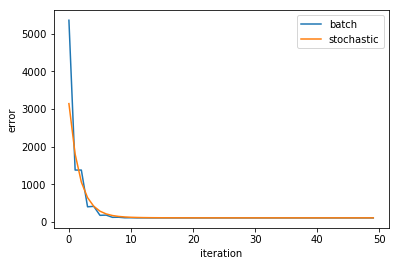

In [7]:
def run():
    points = np.genfromtxt("data/data_linear_regression.csv", delimiter=",")
    
    # using batch gradient descent
    loss_values = []
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_w = 0 # initial slope guess
    num_iterations = 50
    print("Starting batch gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_w, compute_error_for_line_given_points(initial_b, initial_w, points)))
    print("Running...")
    [b, w] = batch_gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations, loss_values)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, w, compute_error_for_line_given_points(b, w, points)))
    plt.plot(loss_values, label="batch")
    
    print("")
    # using stochastic gradient descent
    loss_values = []
    learning_rate = 0.000001
    initial_b = 0 # initial y-intercept guess
    initial_w = 0 # initial slope guess
    num_iterations = 50
    print("Starting stochastic gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_w, compute_error_for_line_given_points(initial_b, initial_w, points)))
    print("Running...")
    [b, w] = stochastic_gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations, loss_values)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, w, compute_error_for_line_given_points(b, w, points)))
    plt.plot(loss_values, label="stochastic")
    
    plt.legend(loc="upper right")
    plt.xlabel("iteration")
    plt.ylabel("error")
run()

## Sigmoid Classification of Gradient Descent with simplest NN

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### data preparation

In [10]:
# Make dummy variables for rank, Convert categorical variable into dummy/indicator variables
admissions = pd.read_csv('data/data_sigmoid_classification.csv')
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.ix[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']


<img src="asset/sigmoid_gradient.png",width=550,height=550, style="float: left;">

In [11]:
# Defining the sigmoid function for activations
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [24]:
# loss function using mean squ
def batch_gradient_descent(weights, features, targets, learnrate):
    del_w = np.zeros(weights.shape)
    # Loop through all records, x is the input, y is the target
    for x, y in zip(features.values, targets):
        # Calculate the output
        output = sigmoid(np.dot(x,weights))
        # Calculate change in weights. we can also call sigmoid_prime instead of "output * (1-output)"
        # Simultaneously calculate all features in one data 
        del_w += (2/n_records) * (y-output) * output * (1-output) * x

        # Update weights
    weights += learnrate * del_w

### training process

In [40]:
n_records, n_features = features.shape
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.01

def train():
    for e in range(epochs):
        batch_gradient_descent(weights, features, targets, learnrate)
        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)           
            print("Train loss: ", loss)

train()

Train loss:  0.245979456349
Train loss:  0.241119268558
Train loss:  0.237008000385
Train loss:  0.233489933426
Train loss:  0.23044256818
Train loss:  0.227772089607
Train loss:  0.22540744723
Train loss:  0.223294879997
Train loss:  0.221393459701
Train loss:  0.219671680965


In [41]:
# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.750
